In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=5e3c0349a639c1d508b9348cc6431454fbee7e73a9fdd5ac264a68ff24ae05b3
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from langdetect import detect, LangDetectException

In [37]:
def load_jsonl_to_df(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if line:
                data.append(json.loads(line))
    return pd.DataFrame(data)

In [38]:
harris_df = load_jsonl_to_df('/content/drive/MyDrive/[인공지능기초]/predict/youtube/LLM/preprocess/harris_youtube_comment.jsonl')
trump_df = load_jsonl_to_df('/content/drive/MyDrive/[인공지능기초]/predict/youtube/LLM/preprocess/trump_youtube_comment.jsonl')

## 길이분포 확인

In [39]:
harris_df['comment_length'] = harris_df['textDisplay'].apply(len)
trump_df['comment_length'] = trump_df['textDisplay'].apply(len)

In [40]:
print(len(harris_df))
print(len(trump_df))

96987
223578


In [41]:
print(harris_df['comment_length'].max())
print(harris_df['comment_length'].min())
print(trump_df['comment_length'].max())
print(trump_df['comment_length'].min())

9457
0
9896
0


In [42]:
def plot_length_distribution(df, title):
    plt.figure(figsize=(10, 6))
    df['comment_length'].hist(bins=50)
    plt.title(f'Length Distribution: {title}')
    plt.xlabel('Comment Length')
    plt.ylabel('Frequency')
    plt.show()

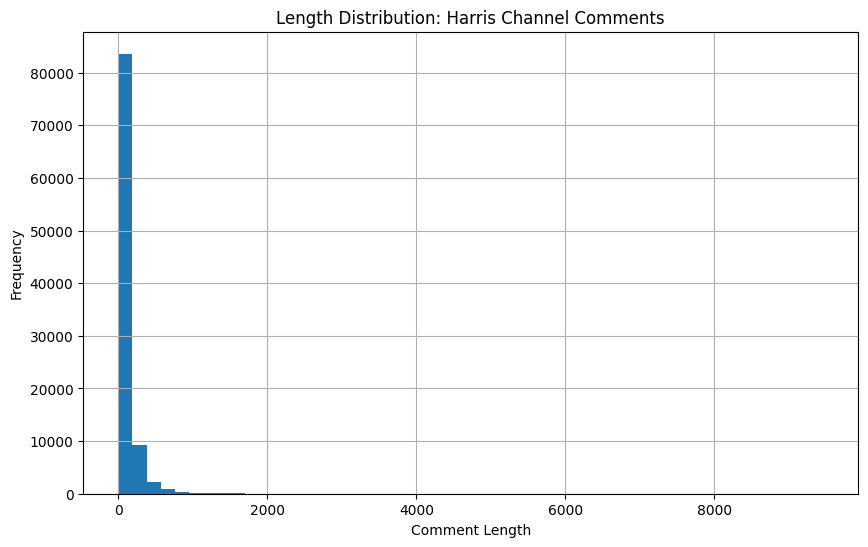

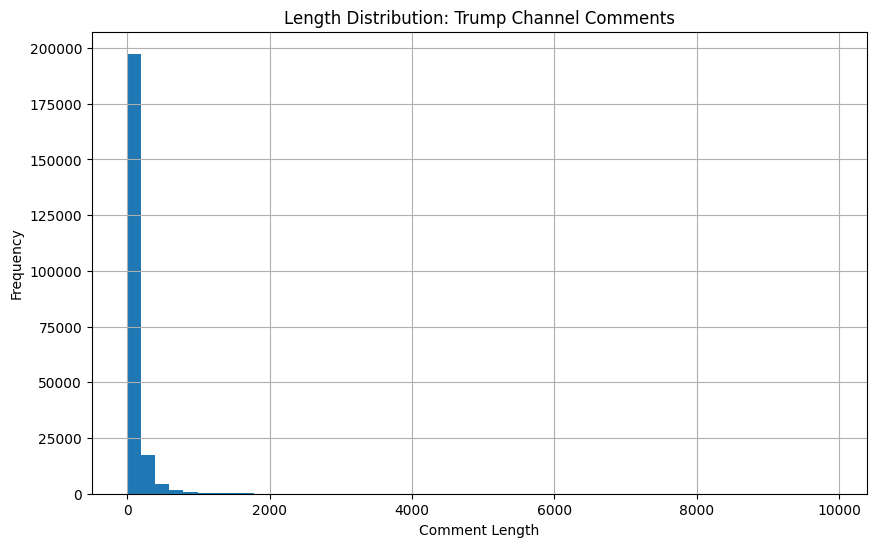

In [43]:
plot_length_distribution(harris_df, 'Harris Channel Comments')
plot_length_distribution(trump_df, 'Trump Channel Comments')

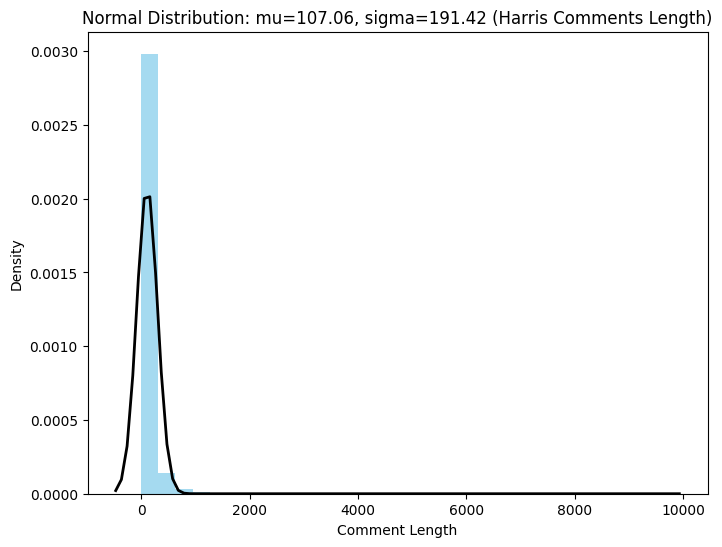

Mean: 107.06, Standard Deviation: 191.42


In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# harris_df에서 comment_length 데이터 추출
data = harris_df['comment_length']

# 히스토그램을 그려 데이터 분포 확인
plt.figure(figsize=(8, 6))
sns.histplot(data, bins=30, kde=False, color='skyblue', stat='density', linewidth=0)

# 이론적인 정규분포 곡선을 그리기 위해 적절한 범위로 x값 생성
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# 정규분포의 평균과 표준편차 계산
mu, sigma = data.mean(), data.std()

# 정규분포의 확률 밀도 함수 (PDF)를 계산
p = norm.pdf(x, mu, sigma)

# 이론적인 정규분포 그래프 추가
plt.plot(x, p, 'k', linewidth=2)

# 제목과 레이블 추가
plt.title(f'Normal Distribution: mu={mu:.2f}, sigma={sigma:.2f} (Harris Comments Length)')
plt.xlabel('Comment Length')
plt.ylabel('Density')

# 그래프 출력
plt.show()

print(f'Mean: {mu:.2f}, Standard Deviation: {sigma:.2f}')

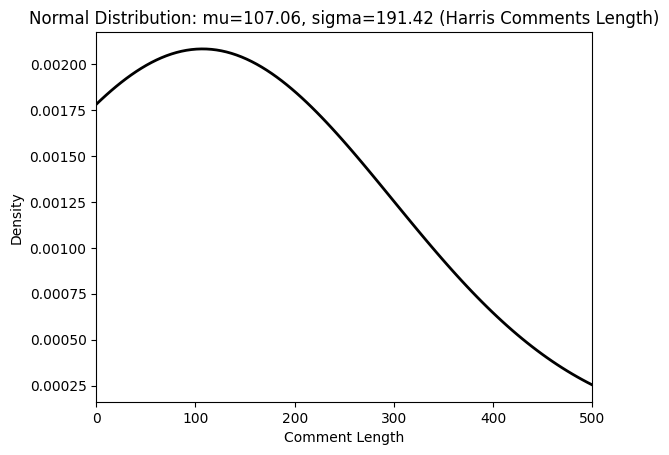

Mean: 107.06, Standard Deviation: 191.42


In [45]:
# x축 범위 설정: 0부터 500까지 확대
plt.xlim(0, 500)

# 이론적인 정규분포 곡선을 그리기 위해 적절한 범위로 x값 생성
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# 정규분포의 평균과 표준편차 계산
mu, sigma = data.mean(), data.std()

# 정규분포의 확률 밀도 함수 (PDF)를 계산
p = norm.pdf(x, mu, sigma)

# 이론적인 정규분포 그래프 추가
plt.plot(x, p, 'k', linewidth=2)

# 제목과 레이블 추가
plt.title(f'Normal Distribution: mu={mu:.2f}, sigma={sigma:.2f} (Harris Comments Length)')
plt.xlabel('Comment Length')
plt.ylabel('Density')

# 그래프 출력
plt.show()

# 정규분포의 평균과 표준편차 출력
print(f'Mean: {mu:.2f}, Standard Deviation: {sigma:.2f}')

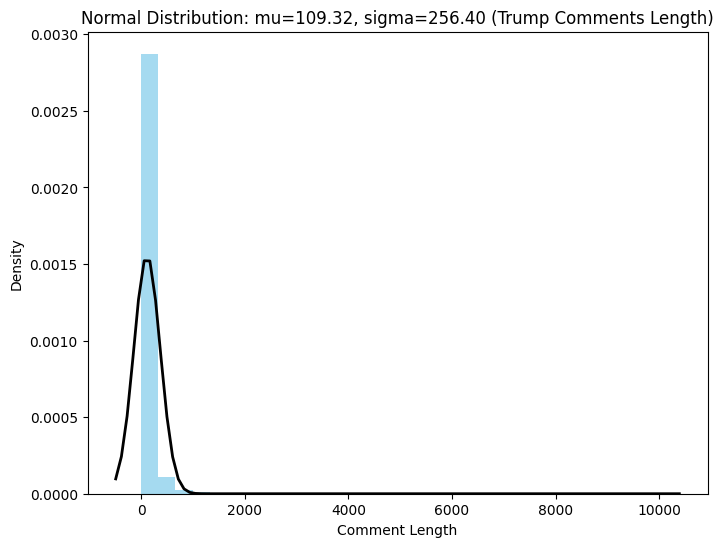

Mean: 109.32, Standard Deviation: 256.40


In [46]:
data = trump_df['comment_length']

plt.figure(figsize=(8, 6))
sns.histplot(data, bins=30, kde=False, color='skyblue', stat='density', linewidth=0)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu, sigma = data.mean(), data.std()
p = norm.pdf(x, mu, sigma)

plt.plot(x, p, 'k', linewidth=2)
plt.title(f'Normal Distribution: mu={mu:.2f}, sigma={sigma:.2f} (Trump Comments Length)')
plt.xlabel('Comment Length')
plt.ylabel('Density')
plt.show()
print(f'Mean: {mu:.2f}, Standard Deviation: {sigma:.2f}')

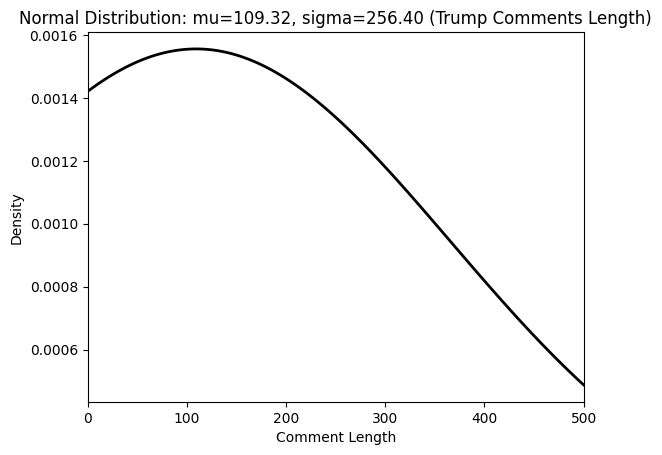

Mean: 109.32, Standard Deviation: 256.40


In [47]:
plt.xlim(0, 500)

# 이론적인 정규분포 곡선을 그리기 위해 적절한 범위로 x값 생성
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# 정규분포의 평균과 표준편차 계산
mu, sigma = data.mean(), data.std()

# 정규분포의 확률 밀도 함수 (PDF)를 계산
p = norm.pdf(x, mu, sigma)

# 이론적인 정규분포 그래프 추가
plt.plot(x, p, 'k', linewidth=2)

# 제목과 레이블 추가
plt.title(f'Normal Distribution: mu={mu:.2f}, sigma={sigma:.2f} (Trump Comments Length)')
plt.xlabel('Comment Length')
plt.ylabel('Density')

# 그래프 출력
plt.show()

# 정규분포의 평균과 표준편차 출력
print(f'Mean: {mu:.2f}, Standard Deviation: {sigma:.2f}')

## 길이 필터링

In [49]:
from tqdm.notebook import tqdm

# 설정 변수
MIN_LENGTH = 20
MAX_LENGTH = 500
MIN_LIKE = 3

def filter_comments(df, min_length, max_length, min_like):
    # tqdm 적용을 위해 map 함수나 apply에 progress bar 적용
    tqdm.pandas(desc="Calculating comment lengths")
    df['comment_length'] = df['textDisplay'].progress_apply(len)

    # 필터링 조건
    condition = (
        (df['comment_length'] >= min_length) &
        (df['comment_length'] <= max_length) &
        (df['likeCount'] >= min_like)
    )
    filtered_df = df[condition]

    print("Filtering complete!")
    print(f"Original count: {len(df)}")
    print(f"Filtered count: {len(filtered_df)}")

    return filtered_df

In [50]:
# 필터링
harris_filtered = filter_comments(harris_df, MIN_LENGTH, MAX_LENGTH, MIN_LIKE)
trump_filtered = filter_comments(trump_df, MIN_LENGTH, MAX_LENGTH, MIN_LIKE)

Calculating comment lengths:   0%|          | 0/96987 [00:00<?, ?it/s]

Filtering complete!
Original count: 96987
Filtered count: 28742


Calculating comment lengths:   0%|          | 0/223578 [00:00<?, ?it/s]

Filtering complete!
Original count: 223578
Filtered count: 25113


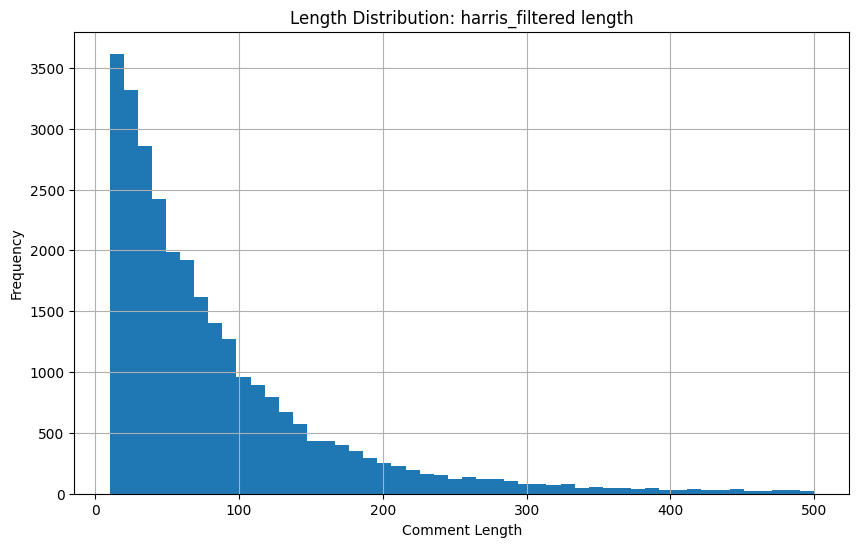

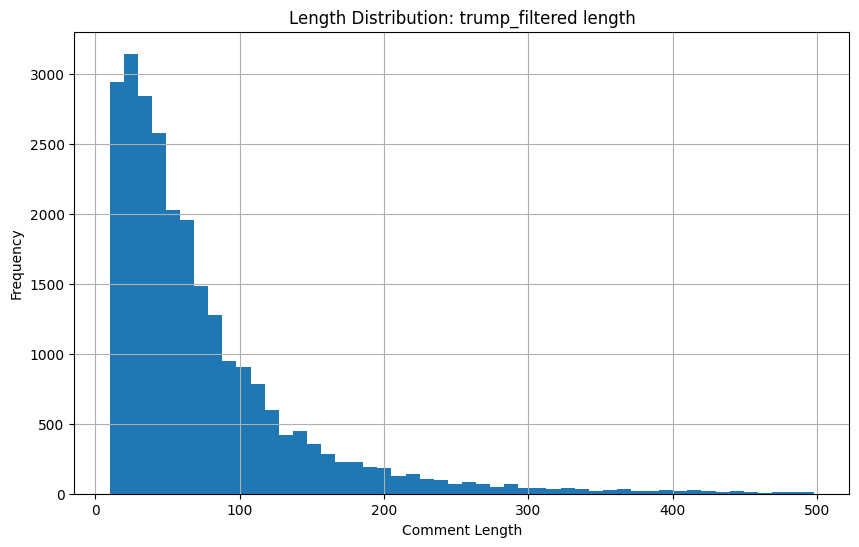

In [52]:
plot_length_distribution(harris_filtered, 'harris_filtered length')
plot_length_distribution(trump_filtered, 'trump_filtered length')

In [53]:
# 설정 변수
MIN_LENGTH = 20
MAX_LENGTH = 200
MIN_LIKE = 3

In [54]:
# 필터링
harris_filtered = filter_comments(harris_df, MIN_LENGTH, MAX_LENGTH, MIN_LIKE)
trump_filtered = filter_comments(trump_df, MIN_LENGTH, MAX_LENGTH, MIN_LIKE)

Calculating comment lengths:   0%|          | 0/96987 [00:00<?, ?it/s]

Filtering complete!
Original count: 96987
Filtered count: 22698


Calculating comment lengths:   0%|          | 0/223578 [00:00<?, ?it/s]

Filtering complete!
Original count: 223578
Filtered count: 20778


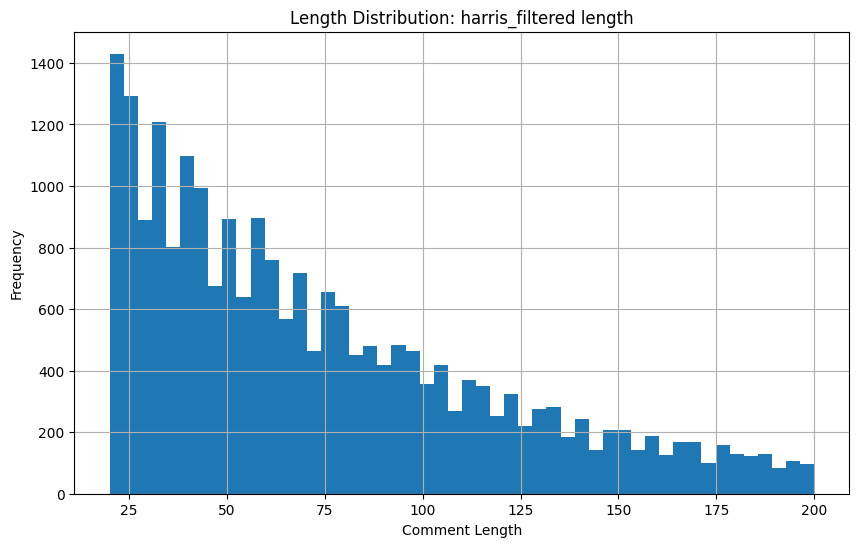

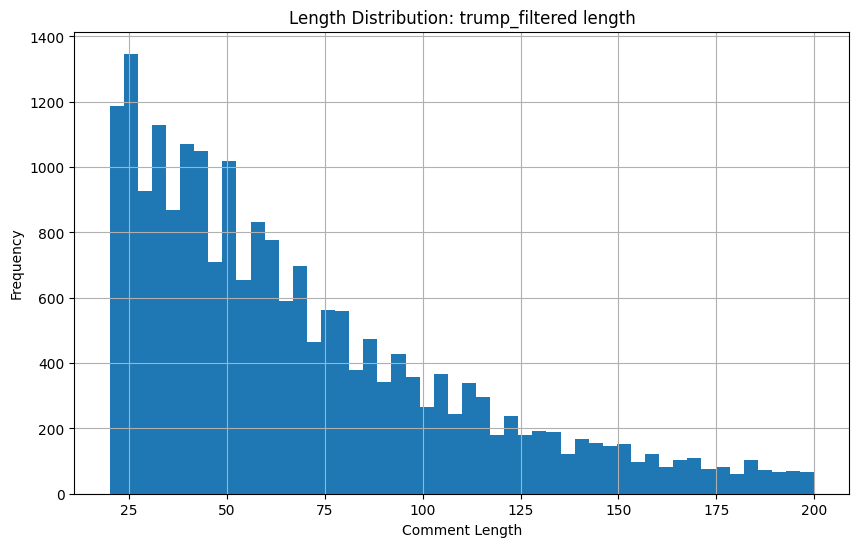

In [55]:
plot_length_distribution(harris_filtered, 'harris_filtered length')
plot_length_distribution(trump_filtered, 'trump_filtered length')

# 언어 필터링

In [56]:
from tqdm.notebook import tqdm
from langdetect import detect, LangDetectException

def filter_english_comments(df):
    tqdm.pandas(desc="Detecting language")

    def detect_lang(text):
        try:
            return detect(text)
        except LangDetectException:
            return 'unknown'

    # 언어 감지
    df['language'] = df['textDisplay'].progress_apply(detect_lang)

    # 영어 댓글만 필터링
    english_df = df[df['language'] == 'en']

    print(f"Original count: {len(df)}")
    print(f"English-only count: {len(english_df)}")

    return english_df


In [57]:
harris_filtered_en_df = filter_english_comments(harris_filtered)

Detecting language:   0%|          | 0/22698 [00:00<?, ?it/s]

Original count: 22698
English-only count: 19628


<ipython-input-56-3ca97dbf8769>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['language'] = df['textDisplay'].progress_apply(detect_lang)


In [58]:
trump_filtered_en_df = filter_english_comments(trump_filtered)

Detecting language:   0%|          | 0/20778 [00:00<?, ?it/s]

Original count: 20778
English-only count: 18120


<ipython-input-56-3ca97dbf8769>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['language'] = df['textDisplay'].progress_apply(detect_lang)


In [59]:
print(len(harris_filtered_en_df))
print(len(trump_filtered_en_df))

19628
18120


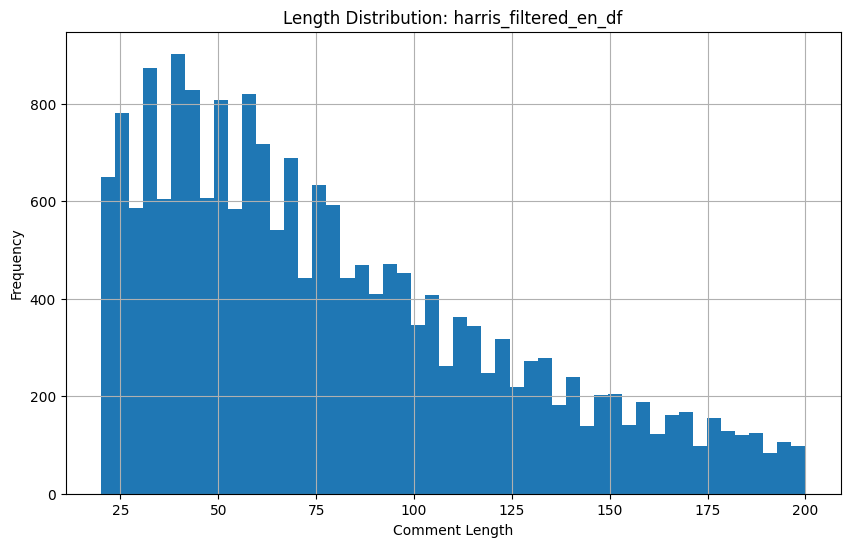

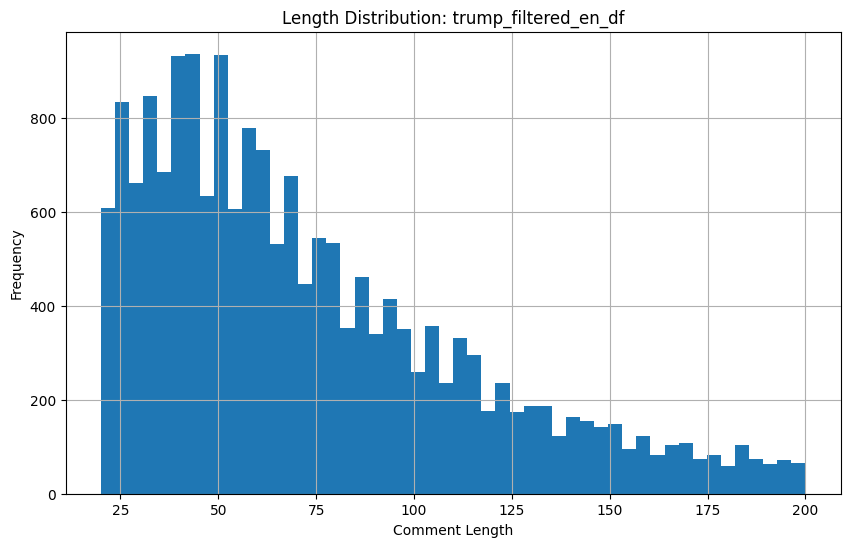

In [60]:
plot_length_distribution(harris_filtered_en_df, 'harris_filtered_en_df')
plot_length_distribution(trump_filtered_en_df, 'trump_filtered_en_df')

# 다운샘플링

In [61]:
harris_18000_df = harris_filtered_en_df.sample(n=18000, random_state=42)
trump_18000_df = trump_filtered_en_df.sample(n=18000, random_state=42)

In [63]:
print(len(harris_18000_df))
print(len(trump_18000_df))

18000
18000


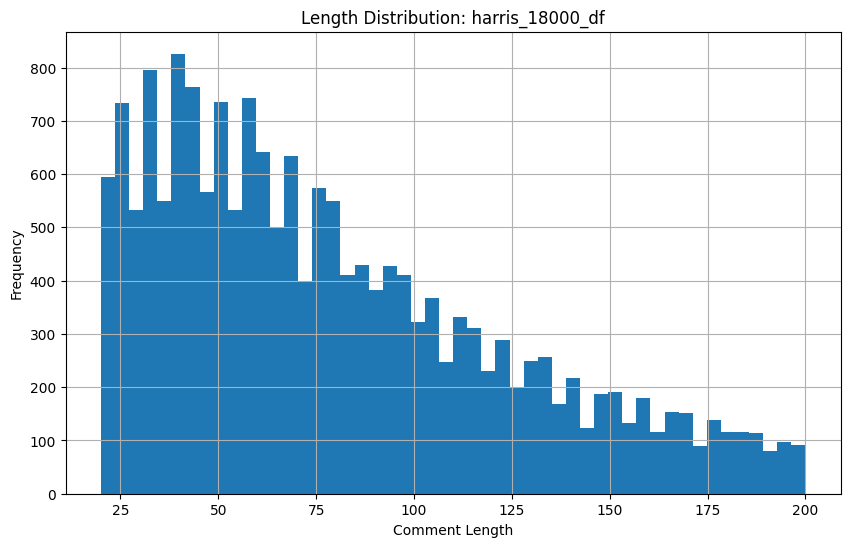

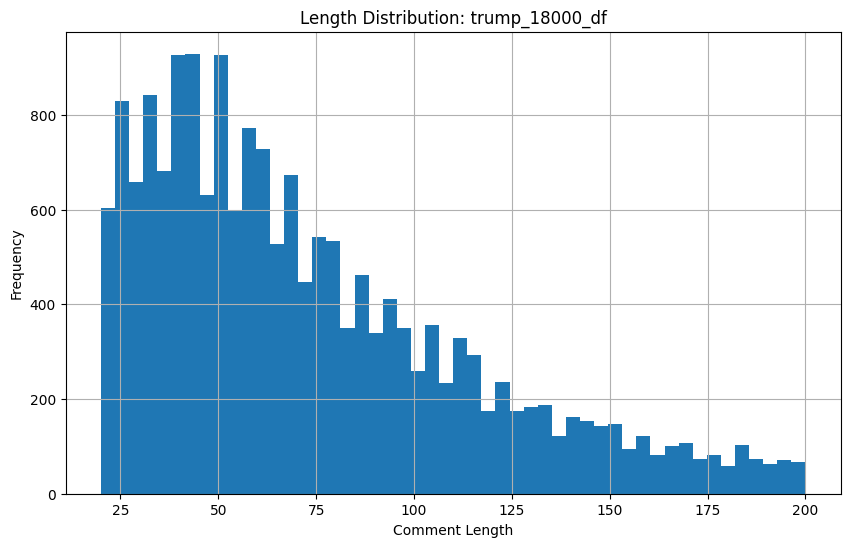

In [64]:
plot_length_distribution(harris_18000_df, 'harris_18000_df')
plot_length_distribution(trump_18000_df, 'trump_18000_df')

## 저장

In [66]:
harris_18000_df.to_json('harris_youtube_comment_filtered.jsonl', orient='records', lines=True, force_ascii=False)
trump_18000_df.to_json('trump_youtube_comment_filtered.jsonl', orient='records', lines=True, force_ascii=False)